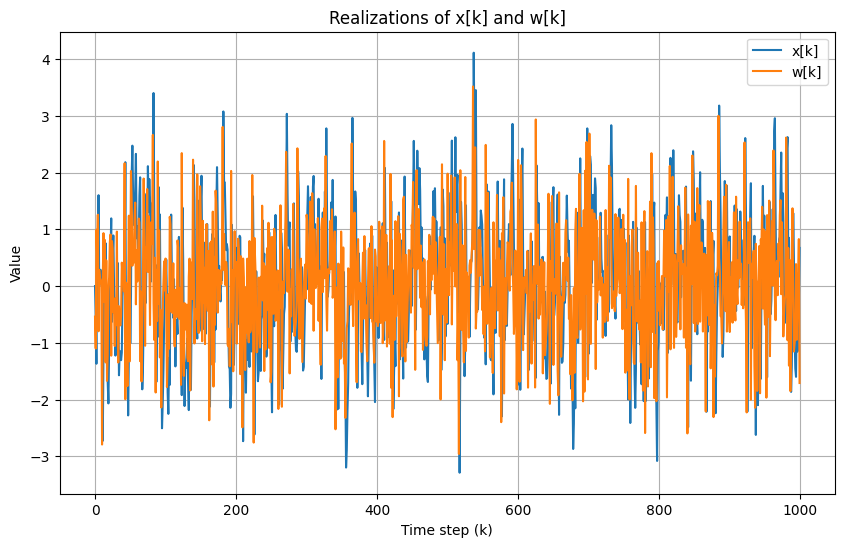

In [8]:
# 1c

import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_samples = 1000
sigma_squared = 1.0

# Generate white Gaussian noise (w_k)
w = np.random.normal(0, np.sqrt(sigma_squared), num_samples)

# Initialize x_k with x_0 = 0
x = np.zeros(num_samples)

# Generate realizations of x_k based on the given process
for k in range(0, num_samples-1):
    x[k+1] = 0.5 * x[k] + w[k]

# Plot the realizations of x_k and w_k
plt.figure(figsize=(10, 6))
plt.plot(x, label='x[k]')
plt.plot(w, label='w[k]')
plt.xlabel('Time step (k)')
plt.ylabel('Value')
plt.legend()
plt.title('Realizations of x[k] and w[k]')
plt.grid(True)
plt.show()


For a = 0.1:
Average of x(k): -0.0041648888250197256
Variance of x(k): 0.007604231395254409
Average of w(k): -0.0014310233014227646
Variance of w(k): 0.010169041086467701




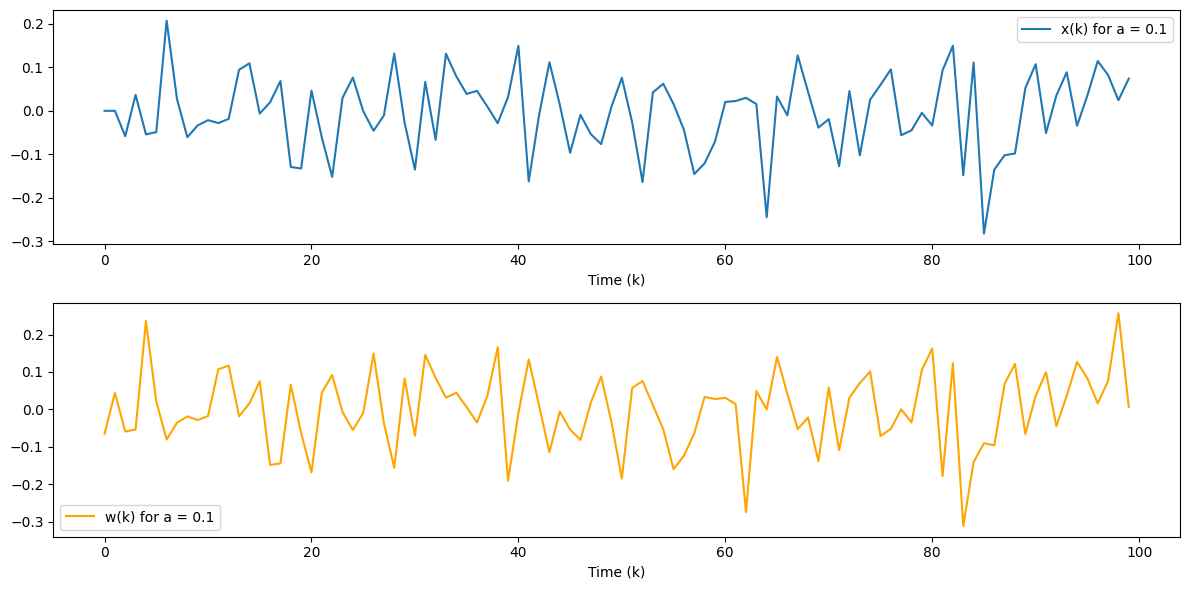




For a = 0.95:
Average of x(k): -0.004272583448879464
Variance of x(k): 5.521937661620224e-05
Average of w(k): -0.0014310233014227646
Variance of w(k): 0.010169041086467701




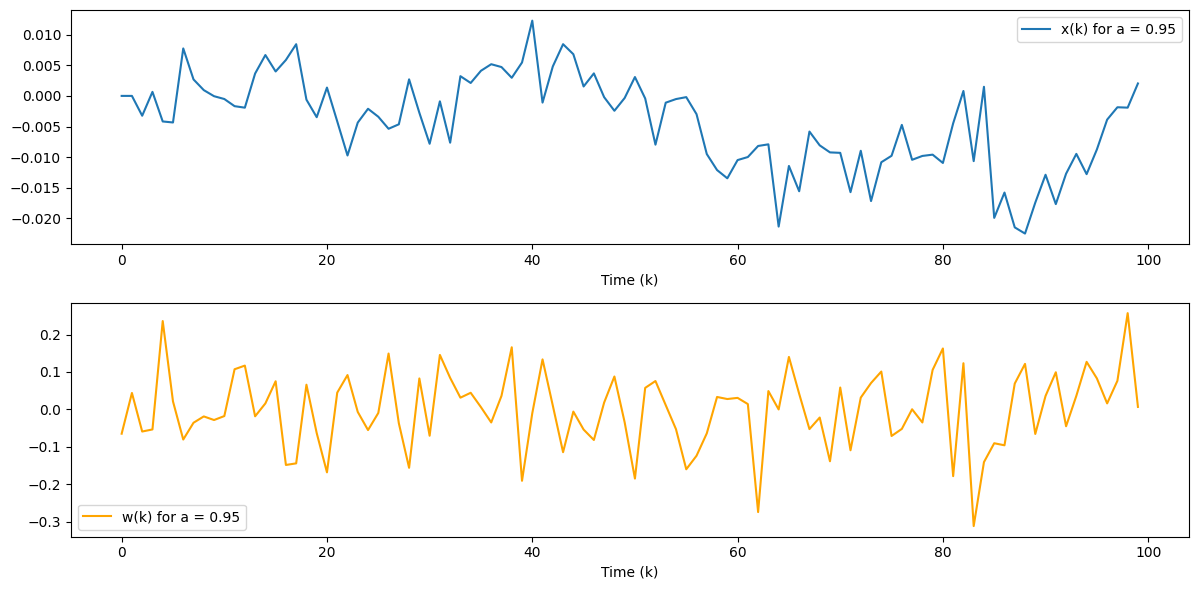

In [26]:
# 2d

import numpy as np
import matplotlib.pyplot as plt

# Define parameters
a_values = [0.1, 0.95]
sigma_squared = 0.01
num_samples = 100  # Number of samples

# Generate w(k)
wk = np.random.normal(0, np.sqrt(sigma_squared), num_samples)

# Generate realizations for each 'a' value
for a in a_values:
    # Define A and B matrices for the current 'a' value
    A = np.array([[0, 1], [a/2, a/2]])
    B = np.array([0, 1-a])

    Xk = np.zeros((2, num_samples))  # Initialize X(k) vector
    xk = np.zeros(num_samples)      # Initialize x(k) array

    # Generate realizations for X(k)
    for k in range(0, num_samples - 1):
        Xk[:, k+1] = np.dot(A, Xk[:, k]) + B * wk[k]

    # Extract x(k) from X(k)
    xk = Xk[0, :]

    # Print the results
    print(f"For a = {a}:")
    print("Average of x(k):", np.mean(xk))
    print("Variance of x(k):", np.var(xk))
    print("Average of w(k):", np.mean(wk))
    print("Variance of w(k):", np.var(wk))
    print("\n")

    # Plot x(k) and w(k) separately for the current 'a' value
    plt.figure(figsize=(12, 6))

    # Plot x(k)
    plt.subplot(2, 1, 1)
    plt.plot(xk, label=f'x(k) for a = {a}')
    plt.legend()
    plt.xlabel('Time (k)')

    # Plot w(k)
    plt.subplot(2, 1, 2)
    plt.plot(wk, label=f'w(k) for a = {a}', color='orange')
    plt.legend()
    plt.xlabel('Time (k)')

    plt.tight_layout()
    plt.show()
    print("\n\n")



In [65]:
# 3a

import numpy as np

# Define parameters
a = 0.9
sigma_squared = 0.01
k_values = [50, 100, 500]  # Values of k for which we want to calculate the covariance matrices
num_samples = max(k_values)+1  # Number of samples

# Define A and B matrices
A = np.array([[0, 1], [a/2, a/2]])
B = np.array([0, 1-a])

# Initialize arrays to store X(k) realizations
Xk = np.zeros((2, num_samples))
wk = np.random.normal(0, np.sqrt(sigma_squared), num_samples)
cov_Xk = {}
# Generate X(k) realizations
for k in range(0, num_samples - 1):
    Xk[:, k+1] = np.dot(A, Xk[:, k]) + B * wk[k]

    sum_Xk_XkT = np.zeros((2, 2))
    for i in range(k):
        sum_Xk_XkT += np.dot(Xk[:, i], Xk[:, i].T)

    cov_Xk[k+1] = np.dot(np.dot(A, sum_Xk_XkT) / ((k+1)), A.T) + np.dot(B, B.T) * sigma_squared # k+1 cuz k=0 os 1 sample

# Print the results
for k in k_values:
    print(f"For k = {k}:")
    print("Covariance matrix cov(X(k)):")
    print(cov_Xk[k])
    print("\n")



For k = 50:
Covariance matrix cov(X(k)):
[[0.00053839 0.00049455]
 [0.00049455 0.0004551 ]]


For k = 100:
Covariance matrix cov(X(k)):
[[0.00068158 0.00062342]
 [0.00062342 0.00057108]]


For k = 500:
Covariance matrix cov(X(k)):
[[0.00070344 0.0006431 ]
 [0.0006431  0.00058879]]




In [64]:
# 3 b,c

import numpy as np

# Define parameters
a = 0.9
sigma_squared = 0.01
k_values = [50, 100, 500]  # Values of k for which we want to estimate covariance matrices
num_samples = max(k_values) + 1  # Number of samples
num_runs_list = [100, 500, 1000, 5000]  # List of different numbers of Monte Carlo runs

# Define A and B matrices
A = np.array([[0, 1], [a/2, a/2]])
B = np.array([0, 1-a])

# Initialize arrays to store covariance estimates for each run and k
cov_estimates = {k: {} for k in k_values}

# Iterate through different numbers of runs
for num_runs in num_runs_list:
    # Initialize covariance estimates for the current number of runs
    for k in k_values:
        cov_estimates[k][num_runs] = np.zeros((2, 2))

    # Run Monte Carlo simulations
    for _ in range(num_runs):
        Xk = np.zeros((2, num_samples))
        wk = np.random.normal(0, np.sqrt(sigma_squared), num_samples)

        for k in range(0, num_samples - 1):
            Xk[:, k+1] = np.dot(A, Xk[:, k]) + B * wk[k]

            if k + 1 in k_values:
                for k_val in k_values:
                    if k + 1 >= k_val:
                        cov_estimates[k_val][num_runs] += np.outer(Xk[:, k+1], Xk[:, k+1]) # sum of Xk XkT

    # Average the covariance estimates over runs
    for k_val in k_values:
        cov_estimates[k_val][num_runs] /= num_runs

# Print the estimated covariance matrices for different numbers of runs
for num_runs in num_runs_list:
    print(f"Number of Runs: {num_runs}")
    for k in k_values:
        print(f"Estimated Covariance Matrix for X{k}:")
        print(cov_estimates[k][num_runs])
        print("\n")


# no 3a, eu faço a simulação uma vez e calculo as cov(X(k+1)) a partir da expressao:
# cov_Xk[k+1] = np.dot(np.dot(A, sum_Xk_XkT) / ((k+1)), A.T) + np.dot(B, B.T) * sigma_squared # k+1 cuz k=0 os 1 sample

# aqui, com monte carlo eu faço a simulação num_run vezes, considero a sum da Xk_XkT (E(Xk) = 0, simplifica, ver slides)
# a minha cov é a média da sum

Number of Runs: 100
Estimated Covariance Matrix for X50:
[[0.00137998 0.00114626]
 [0.00114626 0.00134385]]


Estimated Covariance Matrix for X100:
[[0.00087828 0.0007514 ]
 [0.0007514  0.00089838]]


Estimated Covariance Matrix for X500:
[[0.00042943 0.00037301]
 [0.00037301 0.00045243]]


Number of Runs: 500
Estimated Covariance Matrix for X50:
[[0.0011081  0.00092585]
 [0.00092585 0.00113147]]


Estimated Covariance Matrix for X100:
[[0.00072883 0.0006024 ]
 [0.0006024  0.00074066]]


Estimated Covariance Matrix for X500:
[[0.00037344 0.00029966]
 [0.00029966 0.00035921]]


Number of Runs: 1000
Estimated Covariance Matrix for X50:
[[0.00114983 0.00093329]
 [0.00093329 0.00112926]]


Estimated Covariance Matrix for X100:
[[0.00077985 0.00063008]
 [0.00063008 0.00075487]]


Estimated Covariance Matrix for X500:
[[0.00037683 0.00030867]
 [0.00030867 0.00037337]]


Number of Runs: 5000
Estimated Covariance Matrix for X50:
[[0.00114128 0.00094127]
 [0.00094127 0.0011531 ]]


Estimated Co

In [73]:
# 4c

# Initialize arrays to store realizations of the state vector and output (position)
num_states = 2  # Number of states (position and velocity)
t = 100
T = 0.1
num_realizations = 1000
sigma_squared = 0.01
state_realizations = np.zeros((num_realizations, num_states, t + 1))
position_realizations = np.zeros((num_realizations, t + 1))

# Perform Monte Carlo simulation
for realization in range(num_realizations):
    # Initialize state vector [position, velocity] at time t=0
    state = np.array([0.0, 0.0])

    for time_step in range(t):  # Use t = 100 for estimating p(100)
        # Generate random acceleration with normal distribution (a(k) = 0)
        w = np.random.normal(0, np.sqrt(sigma_squared))

        # Update state using state-space model with multiplication by T
        state = state + T * (np.dot(A, state) + np.dot(B, w))  # Ensure the noise has correct dimensions

        # Store the state and position at each time step
        state_realizations[realization, :, time_step + 1] = state
        position_realizations[realization, time_step + 1] = state[0]  # Position (p)

# Extract the position (p) at time t=100 for all realizations
p_100_samples = position_realizations[:, t]

# Calculate the sample mean and sample covariance of p(100)
mean_p_100 = np.mean(p_100_samples)
cov_p_100 = np.cov(p_100_samples, rowvar=False)  # Specify rowvar=False to calculate covariance correctly

# Print the results
print("Sample Mean of p(100):", mean_p_100)
print("Sample Covariance of p(100):\n", cov_p_100)



ValueError: ignored